# Plot MFT prediction of input response of unstructured network

For inputs to all, single, or $Q$ populations, as function of $D$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from disp import set_plot

In [5]:
data_mft = np.load('data/input_response/mft_input_rsp.npy', allow_pickle=True)[0]
fr_1_mfts = data_mft['fr_1s']
data_full = np.load('data/input_response/full_input_rsp.npy', allow_pickle=True)[0]
fr_1_fulls = data_mft['fr_1s']

DS = data_mft['DS']
NPPLN_STIMS = data_mft['NPPLN_STIMS']
U_SCALES = data_mft['U_SCALES']

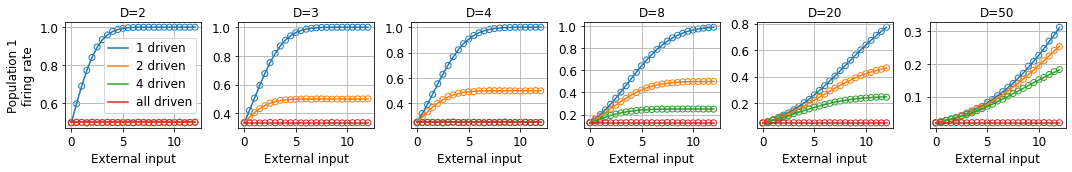

In [20]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axs = plt.subplots(1, len(DS), figsize=(2.5*len(DS), 2.5), tight_layout=True)
for cD, (D, ax) in enumerate(zip(DS, axs)):
    for cNPPLN_STIM, NPPLN_STIM in enumerate(NPPLN_STIMS):
        ax.plot(U_SCALES, fr_1_mfts[cNPPLN_STIM, cD, 0, :], c=colors[cNPPLN_STIM])
        ax.scatter(U_SCALES, fr_1_fulls[cNPPLN_STIM, cD, :, :].mean(axis=0), facecolors='none', edgecolors=colors[cNPPLN_STIM])
    ax.grid()
    set_plot(ax, x_label='External input', title=f'D={D}')
    if cD == 0:
        ax.legend([f'{NPPLN_STIM} driven' for NPPLN_STIM in NPPLN_STIMS])
        set_plot(ax, y_label='Population 1\nfiring rate')

fig.savefig('figs/main/3_inp_response.svg')

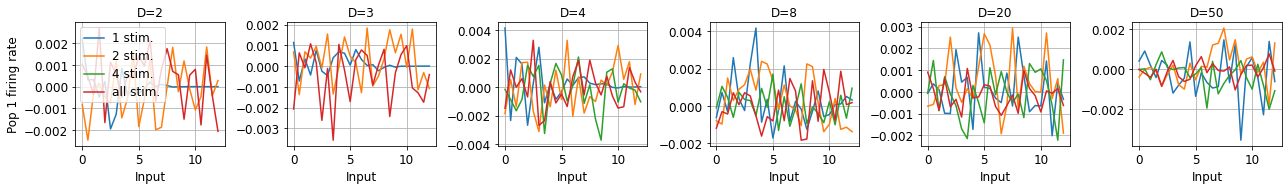

In [13]:
# check that responses are not exactly the same and that it's just the predictions that are really good
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axs = plt.subplots(1, len(DS), figsize=(3*len(DS), 2.75), tight_layout=True)
for cD, (D, ax) in enumerate(zip(DS, axs)):
    for cNPPLN_STIM, NPPLN_STIM in enumerate(NPPLN_STIMS):
        ax.plot(U_SCALES, fr_1_mfts[cNPPLN_STIM, cD, 0, :] - fr_1_fulls[cNPPLN_STIM, cD, :, :].mean(axis=0), c=colors[cNPPLN_STIM])
    ax.grid()
    set_plot(ax, x_label='Input', title=f'D={D}')
    if cD == 0:
        ax.legend([f'{NPPLN_STIM} stim.' for NPPLN_STIM in NPPLN_STIMS])
        set_plot(ax, y_label='Pop 1 firing rate')